In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mplfinance as mpf

In [41]:
df_litecoin = pd.read_csv('../Dataset/daily/Litecoin Historical Data.csv')
df_litecoin.head()

,Date,Close,Open,High,Low,Vol.,Change %
0,05-04-2025,83.76,84.40,84.94,83.58,910.01K,-0.76%
1,04-04-2025,84.41,83.43,85.09,81.64,933.59K,1.19%
2,03-04-2025,83.41,81.53,84.65,80.18,962.77K,2.30%
3,02-04-2025,81.54,84.48,88.49,81.02,1.44M,-3.49%
4,01-04-2025,84.48,82.95,85.88,82.89,739.37K,1.84%


In [42]:
df_litecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3147 non-null   object 
 1   Close     3147 non-null   float64
 2   Open      3147 non-null   float64
 3   High      3147 non-null   float64
 4   Low       3147 non-null   float64
 5   Vol.      3147 non-null   object 
 6   Change %  3147 non-null   object 
dtypes: float64(4), object(3)
memory usage: 172.2+ KB


In [43]:
def convert_vol_int(obj):
    if isinstance(obj, str):
        if obj.endswith("K"):
            return float(obj[:-1]) / 1000
        elif obj.endswith("M"):
            return float(obj[:-1])
        else:
            return float(obj)
    return obj  

def convert_change_int(obj):
    if isinstance(obj, str) and obj.endswith("%"):
        return float(obj[:-1])
    return obj  

In [44]:
df_litecoin.columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [45]:
df_litecoin["Vol."] = df_litecoin['Vol.'].apply(convert_vol_int)
df_litecoin['Change %'] = df_litecoin['Change %'].apply(convert_change_int)
df_litecoin['Date'] = pd.to_datetime(df_litecoin['Date'], format='%d-%M-%Y').dt.date

In [46]:
df_litecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3147 non-null   object 
 1   Close     3147 non-null   float64
 2   Open      3147 non-null   float64
 3   High      3147 non-null   float64
 4   Low       3147 non-null   float64
 5   Vol.      3147 non-null   float64
 6   Change %  3147 non-null   float64
dtypes: float64(6), object(1)
memory usage: 172.2+ KB


In [47]:
df_litecoin.set_index('Date').tail(100)

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-01-01,3.88,3.84,3.89,3.84,0.00071,1.04
2016-01-30,3.84,3.83,3.98,3.51,0.00789,0.26
2016-01-29,3.83,3.84,3.91,3.81,0.00311,-0.26
2016-01-28,3.84,3.87,3.92,3.81,0.00438,-0.78
2016-01-27,3.87,3.86,3.89,3.82,0.00046,0.26
...,...,...,...,...,...,...
2016-01-28,3.72,3.78,3.78,3.62,0.00819,-1.59
2016-01-27,3.78,3.81,3.85,3.62,0.00491,-0.79
2016-01-26,3.81,3.81,3.90,3.77,0.01435,0.00


In [48]:
df_litecoin.columns = ['Date','Close', 'Open', 'High', 'Low', 'Volume', 'Change']

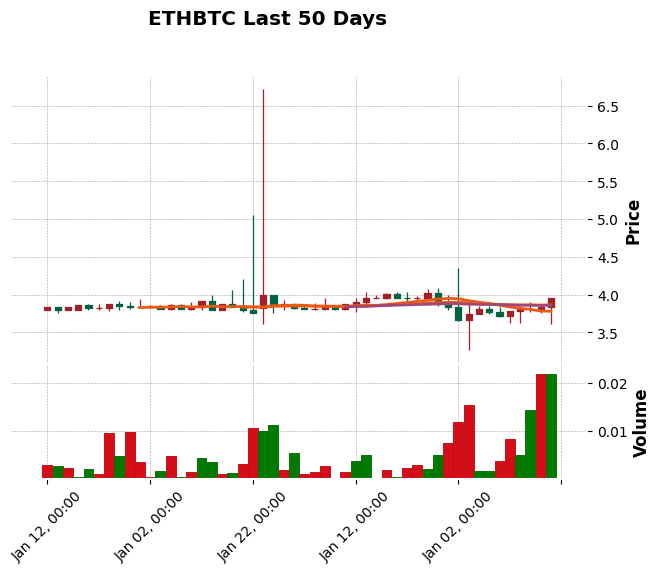

In [51]:
import pandas as pd
import mplfinance as mpf

# Ensure Date column is in datetime64 format
df_litecoin['Date'] = pd.to_datetime(df_litecoin['Date'])

# Set Date as index (must be a DatetimeIndex)
df_litecoin.set_index('Date', inplace=True)

# Plot the last 50 entries
mpf.plot(df_litecoin.tail(50),
         type='candle',
         style='charles',
         volume=True,
         title='ETHBTC Last 50 Days',
         mav=(10, 20, 30))


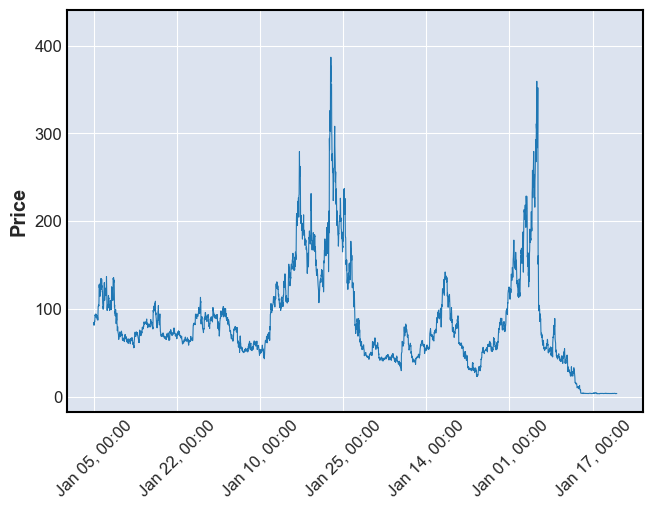

In [52]:
mpf.plot(df_litecoin, type='line')

# Feature Selection